In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=234ed28aa39b86dc6f1726963a2d3f91


In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | saint anthony
Processing Record 3 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | avera
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | flinders
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | egvekinot
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | khani
Processing Record 18 of Set 1 | mehamn
Processing Record 19 of Set 1 | chaman
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | georgetown
Processing Record 23 of Set 1 | vardo
Processing Record 24 o

Processing Record 38 of Set 4 | nampa
Processing Record 39 of Set 4 | katima mulilo
Processing Record 40 of Set 4 | chicama
Processing Record 41 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 4 | ballina
Processing Record 43 of Set 4 | leshukonskoye
Processing Record 44 of Set 4 | bhimunipatnam
Processing Record 45 of Set 4 | bubaque
Processing Record 46 of Set 4 | aguimes
Processing Record 47 of Set 4 | goias
Processing Record 48 of Set 4 | saint-joseph
Processing Record 49 of Set 4 | pangnirtung
Processing Record 50 of Set 4 | hobart
Processing Record 1 of Set 5 | walvis bay
Processing Record 2 of Set 5 | lypova dolyna
Processing Record 3 of Set 5 | najran
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | narsaq
Processing Record 6 of Set 5 | sao felix do xingu
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | mahibadhoo
Processing Record 9 of Set 5 | kaitangata
Processing Record 10 of Set 5 | saskylakh
Pro

Processing Record 30 of Set 8 | falmouth
Processing Record 31 of Set 8 | dingle
Processing Record 32 of Set 8 | paso de los toros
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | sambava
Processing Record 35 of Set 8 | uwayl
City not found. Skipping...
Processing Record 36 of Set 8 | davenport
Processing Record 37 of Set 8 | kuche
City not found. Skipping...
Processing Record 38 of Set 8 | arman
Processing Record 39 of Set 8 | guiratinga
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | alofi
Processing Record 42 of Set 8 | vestmannaeyjar
Processing Record 43 of Set 8 | sendafa
Processing Record 44 of Set 8 | bethel
Processing Record 45 of Set 8 | zhigansk
Processing Record 46 of Set 8 | nantucket
Processing Record 47 of Set 8 | pemangkat
Processing Record 48 of Set 8 | beinamar
Processing Record 49 of Set 8 | lauchhammer
Processing Record 50 of Set 8 | san cristobal
Processing Record 1 of Set 9 | zanjan
Processing Record 2 of Set 9 | sartell
P

Processing Record 16 of Set 12 | babanusah
City not found. Skipping...
Processing Record 17 of Set 12 | longonjo
Processing Record 18 of Set 12 | mizpe ramon
City not found. Skipping...
Processing Record 19 of Set 12 | maua
Processing Record 20 of Set 12 | lianran
Processing Record 21 of Set 12 | jaisalmer
Processing Record 22 of Set 12 | sao jose da coroa grande
Processing Record 23 of Set 12 | beloha
Processing Record 24 of Set 12 | satitoa
City not found. Skipping...
Processing Record 25 of Set 12 | orhei
Processing Record 26 of Set 12 | ikungi
Processing Record 27 of Set 12 | severodvinsk
Processing Record 28 of Set 12 | maracaibo
Processing Record 29 of Set 12 | kushmurun
Processing Record 30 of Set 12 | mtama
Processing Record 31 of Set 12 | uhlove
Processing Record 32 of Set 12 | murwillumbah
Processing Record 33 of Set 12 | burns lake
Processing Record 34 of Set 12 | sindor
Processing Record 35 of Set 12 | balykshi
Processing Record 36 of Set 12 | sinnamary
Processing Record 37

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,79.48,59,38,3.00,US,2021-11-08 00:01:50
1,Saint Anthony,45.0205,-93.2180,58.78,78,40,1.99,US,2021-11-08 00:01:50
2,Petropavlovsk-Kamchatskiy,53.0452,158.6483,34.39,44,20,15.66,RU,2021-11-08 00:01:51
3,Rikitea,-23.1203,-134.9692,75.49,79,100,15.97,PF,2021-11-08 00:01:51
4,Avera,33.1940,-82.5271,53.71,44,0,6.91,US,2021-11-08 00:01:52
5,Thompson,55.7435,-97.8558,35.62,85,59,4.54,CA,2021-11-08 00:00:54
6,Ushuaia,-54.8000,-68.3000,38.05,87,73,2.21,AR,2021-11-08 00:01:40
7,Mataura,-46.1927,168.8643,71.96,38,82,3.69,NZ,2021-11-08 00:01:53
8,Barrow,71.2906,-156.7887,26.62,63,90,10.36,US,2021-11-08 00:01:53
9,Flinders,-34.5833,150.8552,73.80,84,96,4.00,AU,2021-11-08 00:01:53


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-11-08 00:01:50,22.0752,-159.3190,79.48,59,38,3.00
1,Saint Anthony,US,2021-11-08 00:01:50,45.0205,-93.2180,58.78,78,40,1.99
2,Petropavlovsk-Kamchatskiy,RU,2021-11-08 00:01:51,53.0452,158.6483,34.39,44,20,15.66
3,Rikitea,PF,2021-11-08 00:01:51,-23.1203,-134.9692,75.49,79,100,15.97
4,Avera,US,2021-11-08 00:01:52,33.1940,-82.5271,53.71,44,0,6.91


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

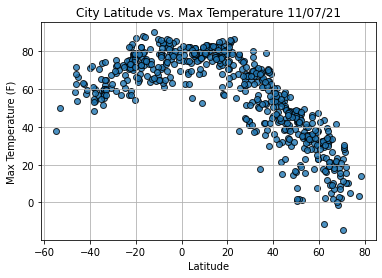

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

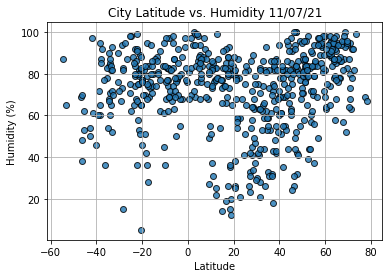

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

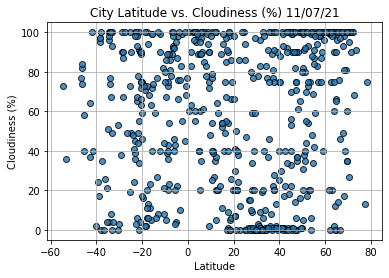

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

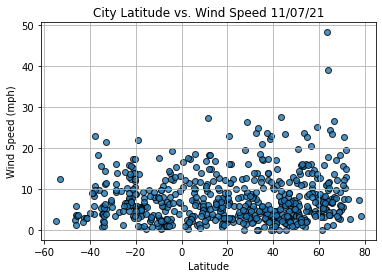

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2021-11-08 00:01:55
Lat                        3.0707
Lng                      172.7902
Max Temp                    82.15
Humidity                       69
Cloudiness                     55
Wind Speed                  11.43
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
587     True
588     True
589     True
590     True
591    False
Name: Lat, Length: 592, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-11-08 00:01:50,22.0752,-159.3190,79.48,59,38,3.00
1,Saint Anthony,US,2021-11-08 00:01:50,45.0205,-93.2180,58.78,78,40,1.99
2,Petropavlovsk-Kamchatskiy,RU,2021-11-08 00:01:51,53.0452,158.6483,34.39,44,20,15.66
4,Avera,US,2021-11-08 00:01:52,33.1940,-82.5271,53.71,44,0,6.91
5,Thompson,CA,2021-11-08 00:00:54,55.7435,-97.8558,35.62,85,59,4.54


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

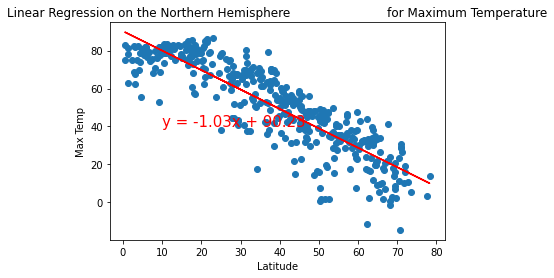

In [25]:
# Linear regression on the Northern Hemisphere - Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

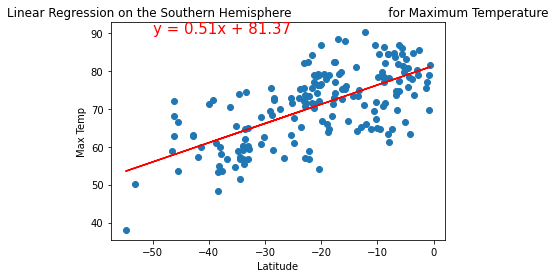

In [27]:
# Linear regression on the Southern Hemisphere - Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

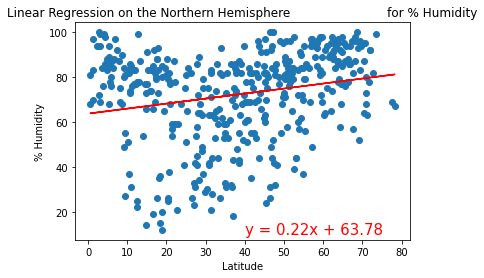

In [28]:
# Linear regression on the Northern Hemisphere - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

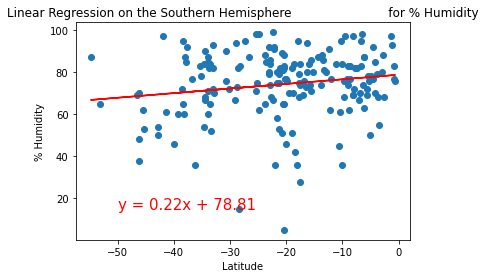

In [30]:
# Linear regression on the Southern Hemisphere - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

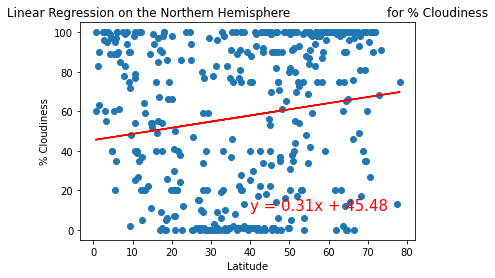

In [31]:
# Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

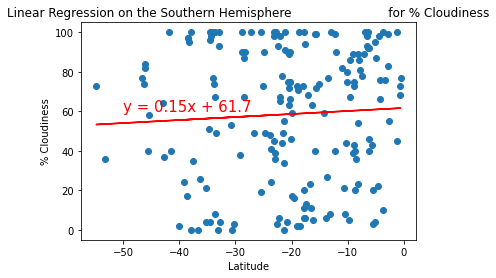

In [32]:
# Linear regression on the Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

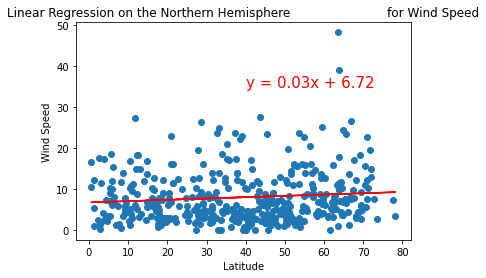

In [34]:
# Linear regression on the Northern Hemisphere - Wind
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

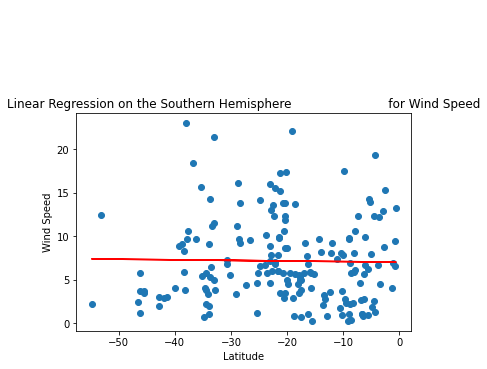

In [35]:
# Linear regression on the Southern Hemisphere - Wind
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))